This cell imports required libraries used in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline

This cell loads the dataset, prints its shape, and displays the first rows.

In [2]:
data = pd.read_csv("UCI_Credit_Card.csv")
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


This cell separates features (X) and the target (y).

In [3]:
X = data.drop(columns=["default.payment.next.month"])
y = data["default.payment.next.month"]

This cell splits the data into training and test sets with stratification.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


This cell defines a scikit-learn pipeline with a StandardScaler and RandomForestClassifier.

In [5]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

This cell trains the pipeline on the training data.

In [6]:
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2


This cell makes predictions on the test set and computes accuracy, ROC AUC, and the classification report.

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("✅ Accuracy:", accuracy)
print("✅ ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8175
✅ ROC AUC: 0.775887907105079

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



This cell extracts feature importances from the trained Random Forest and plots the top 15.

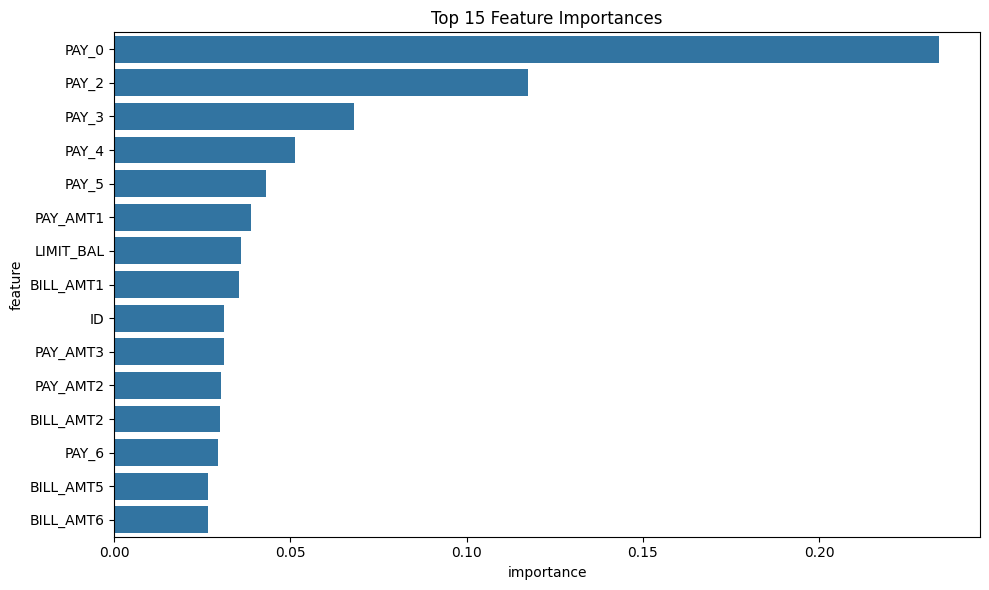

In [8]:
rf_model = model.named_steps["rf"]
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=importances.head(15))
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

This cell saves the trained model and the feature list to disk using joblib.

In [9]:
joblib.dump({
    "model": model,
    "features": list(X.columns)
}, "credit_default_model.pkl")

print("Model and sample input saved ✅")

Model and sample input saved ✅
